In [68]:
#Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import requests
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

Matplotlib is building the font cache; this may take a moment.


In [69]:
#Load the CSV data
csv_url = 'https://raw.githubusercontent.com/ageron/handson-ml2/master/datasets/housing/housing.csv'
response = requests.get(csv_url)
csv_data = StringIO(response.text)
df = pd.read_csv(csv_data)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [70]:
#Clean the data (Drop rows with missing targets)
df = df.dropna(subset=['median_house_value'])
#Separate features & target
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']
#Drop ocean_proximity feature
X = df.drop('ocean_proximity', axis=1, inplace=True)
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0


In [71]:
#Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_imputed)
#Train/test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
#Train the model
model = LinearRegression()
model.fit(X_train, y_train)
#Predict and evaluate
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = mse ** 0.5

print(f"Root Mean Squared Error (RMSE): {rmse:,.2f}")

Root Mean Squared Error (RMSE): 71,133.17


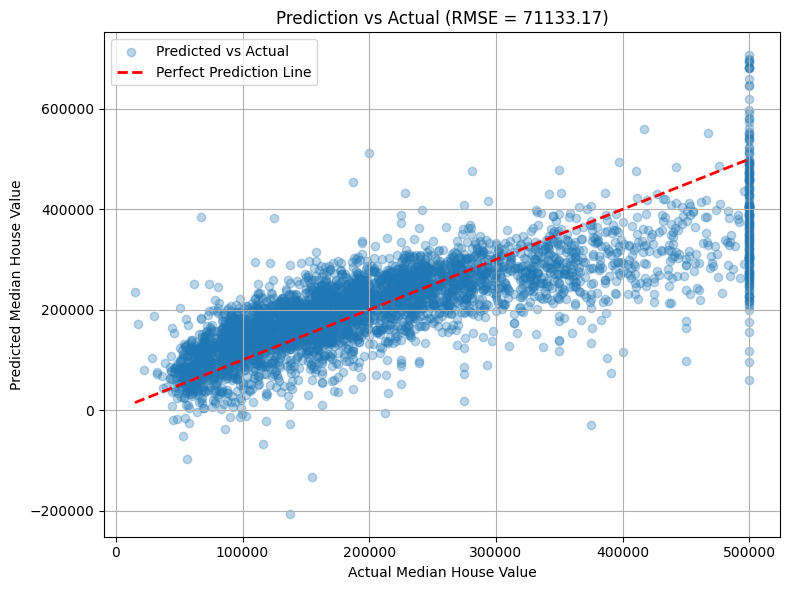

In [72]:
#Plot predicted vs actual
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.3, label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--', lw=2, label='Perfect Prediction Line')
plt.xlabel("Actual Median House Value")
plt.ylabel("Predicted Median House Value")
plt.title(f"Prediction vs Actual (RMSE = {rmse:.2f})")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()